# Background

- The general expression for determining the minor losses (across the singularity) in a pipe system is:
$$
h_L = K \frac{V^2}{2g}
$$

where $h_L$ is the minor head loss due to fittings, bends, valves, or other obstructions (in meters or feet of fluid). $K$ is the loss coefficient for the specific fitting or obstruction, which depends on the geometry and flow conditions of the fitting or component.

- To derive an expression for the loss coefficient $K$ we apply Bernoulli’s equation between the upstream section (1) and the downstream section (2) of the singularity:

$$
\left(\frac{P_1}{\rho g} + \frac{V_1^2}{2g} + z_1\right)- \left(\frac{P_2}{\rho g} + \frac{V_2^2}{2g} + z_2\right) = h_L
$$

- Let us denote $\Delta h$ as the head difference across the singularity. We express it as:
$$\Delta h = \left(\frac{P_1}{\rho g} + \frac{V_1^2}{2g} + z_1\right)- \left(\frac{P_2}{\rho g} + \frac{V_2^2}{2g} + z_2\right)$$

Assuming negligible changes in pressure and elevation across the singularity, this simplifies to:
$$\Delta h = \frac{V_1^2}{2g} - \frac{V_2^2}{2g}$$

- The simplified Bernoulli's equation gives us: 
$$
\Delta h =  K \frac{V^2}{2g} 
$$

Notice that $K$ is the slope of the linear regression $y=Kx$, where $x=\frac{V^2}{2g}$ and $y=\Delta h$.

- For the cases of contraction and expansions, where velocities change significantly, we can further rearrange our expression to obtain:
$$
K = \frac{2g\Delta h}{V^2} = \frac{2g\left(\frac{V_1^2}{2g} - \frac{V_2^2}{2g}\right)}{V^2}=\frac{(V_1^2 - V_2^2)}{V^2}
$$

However, this expression can vary depending on which velocity term (upstream or downstream) is used in place of $V$. In the case of the expansion $V_1\geq V_2$, the outflow would be equal to $V_1$. For the case of contraction $V_1\leq V_2$, then, the outflow would be $V_2$.Using upstream and downstream velocities, the formulas become:
$$
\begin{cases}
K = 1 - \frac{V_2^2}{V_1^2}, \quad \text{for expansion}\\
K = \frac{V_1^2}{V_2^2} - 1, \quad \text{for contraction}
\end{cases}
$$
Knowing the crossing flow rate $Q$, which is the same across the pipe system due to mass conservation, and knowing the crossing diameters, we can determine the velocity $V_i$ at any cross-section by the relation:
$$
V_i=\frac{Q}{A_i} = \frac{4Q}{\pi D_i^2}, \quad \text{and } \, \frac{V_i^2}{2g} = \frac{8Q^2}{\pi^2 g D_i^4}
$$

This can be rearranged to obtain:
$$
\frac{V_i^2}{V_{i+1}^2} = \left(\frac{4Q}{\pi D_i^2}\frac{\pi D_{i+1}^2}{4Q}\right)^2= \frac{D_{i+1}^4}{D_{i}^4}
$$

In [1]:
import numpy as np

def compute_flow_rates(trials, volumes, times):
    flow_rates = []

    for i in range(len(trials)):
        # Compute flow rates for each time measurement in the trial
        flow_rates_trial = [volumes[i] / t for t in times[i]]  # Flow rate in mL/s
        flow_rates.append(flow_rates_trial)

    # Calculate mean and standard deviation for each trial
    mean_flow_rates = [np.mean(flow_rate) for flow_rate in flow_rates]
    std_flow_rates = [np.std(flow_rate) for flow_rate in flow_rates]

    return mean_flow_rates, std_flow_rates

# Given data
trials = ["1", "2", "3", "4", "5"]
volumes = [1200, 1600, 1600, 2000, 2000]  # in mL
times = [[5.33, 5.45, 5.30], 
         [4.53, 4.49, 4.31], 
         [3.63, 3.59, 3.45], 
         [4.31, 4.13, 4.37], 
         [4.00, 4.15, 4.06]]  # in seconds

# Calculate mean flow rates and standard deviations
mean_flow_rates, std_flow_rates = compute_flow_rates(trials, volumes, times)

# Display the results
for trial, mean, std in zip(trials, mean_flow_rates, std_flow_rates):
    print(f"Trial {trial}: Mean Flow Rate = {mean:.2f} mL/s, Std Dev = {std:.2f} mL/s")


Trial 1: Mean Flow Rate = 223.91 mL/s, Std Dev = 2.69 mL/s
Trial 2: Mean Flow Rate = 360.26 mL/s, Std Dev = 7.86 mL/s
Trial 3: Mean Flow Rate = 450.07 mL/s, Std Dev = 9.89 mL/s
Trial 4: Mean Flow Rate = 468.65 mL/s, Std Dev = 11.34 mL/s
Trial 5: Mean Flow Rate = 491.51 mL/s, Std Dev = 7.42 mL/s


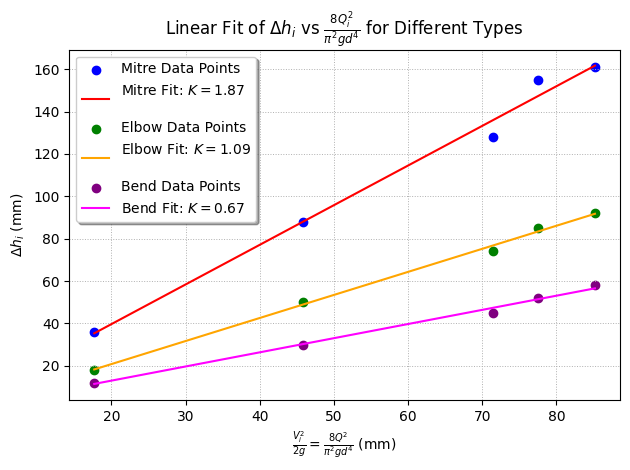

Slope K for Mitre: 1.8707
Slope K for Elbow: 1.0878
Slope K for Bend: 0.6679


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Constants
g = 9.81 * 1000  # gravitational acceleration in mm/s^2

# Sample data for Delta h_i and Q_i 
delta_h_mitre = np.array([476-440, 514-426, 528-400, 530-375, 526-365]) #* 304.8  # delta h_i values for mitre in mm (1-2)
delta_h_elbow = np.array([426-408, 386-336, 332-258, 295-210, 284-192]) #* 304.8 # delta h_i values for elbow in mm (3-4)
delta_h_bend = np.array([390-378, 290-260, 190-145, 130-78, 110-52]) #* 304.8 # delta h_i values for bend in mm (9-10)

Q = np.array([223.91, 360.26, 450.07, 468.65, 491.51]) * 1000  # Q_i values converted from mL/s to mm³/s
#Q = np.array([0.00583, 0.0111, 0.0154, 0.0169, 0.0181]) * 28316831.998815 # Q_i values converted from cfs to mm3/s
d = 22  # Diameter in mm

# Compute the x values for the plot using the equation
x_values = (8 * Q**2) / (np.pi**2 * g * d**4)

# Reshape for linear regression (required shape for sklearn)
x_values = x_values.reshape(-1, 1)

# A function to do the job
def slope_mitre_elbow_bend(delta_h_mitre, delta_h_elbow, delta_h_bend, x_values):
    # Prepare a list to hold the K values and predictions for plotting
    K_values = []
    delta_h_preds = []

    # Fit linear regression for each delta_h dataset
    for delta_h in [delta_h_mitre, delta_h_elbow, delta_h_bend]:
        delta_h = delta_h.reshape(-1, 1)  # Reshape for regression
        model = LinearRegression()
        model.fit(x_values, delta_h)  # Fit the model
        K = model.coef_[0][0]  # Get the slope (K)
        K_values.append(K)  # Store the slope
        delta_h_pred = model.predict(x_values)  # Make predictions
        delta_h_preds.append(delta_h_pred)  # Store predictions
    
    # Plotting
    plt.scatter(x_values, delta_h_mitre, color='blue', label='Mitre Data Points')
    plt.plot(x_values, delta_h_preds[0], color='red', label=f'Mitre Fit: $K={K_values[0]:.2f}$\n')
    
    plt.scatter(x_values, delta_h_elbow, color='green', label='Elbow Data Points')
    plt.plot(x_values, delta_h_preds[1], color='orange', label=f'Elbow Fit: $K={K_values[1]:.2f}$\n')
    
    plt.scatter(x_values, delta_h_bend, color='purple', label='Bend Data Points')
    plt.plot(x_values, delta_h_preds[2], color='magenta', label=f'Bend Fit: $K={K_values[2]:.2f}$')
    
    # Set labels and title
    plt.xlabel(r'$\frac{V_i^2}{2g} = \frac{8Q^2}{\pi^2 g d^4}$ (mm)')
    plt.ylabel(r'$\Delta h_i$ (mm)')
    plt.title('Linear Fit of $\\Delta h_i$ vs $\\frac{8Q_i^2}{\\pi^2 g d^4}$ for Different Types')
    plt.legend(frameon=True, fancybox=True, shadow=True)
    plt.grid(True, which="both", linestyle=':', linewidth=0.7)
    plt.tight_layout()
    plt.show()
    
    # Print the slopes K for each
    for i, label in enumerate(['Mitre', 'Elbow', 'Bend']):
        print(f"Slope K for {label}: {K_values[i]:.4f}")

# Run the program
slope_mitre_elbow_bend(delta_h_mitre, delta_h_elbow, delta_h_bend, x_values)

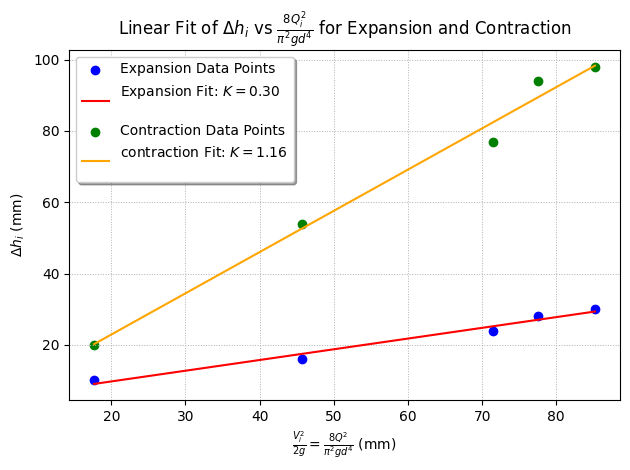

Slope K for Expansion: 0.3008
Slope K for Contraction: 1.1572


In [29]:

# Sample data for Delta h_i and Q_i 
delta_h_expansion = np.array([410-400, 346-330, 275-251, 290-262, 214-184]) #* 304.8  # delta h_i values for expansion in mm (5-6)
delta_h_contraction = np.array([410-390, 346-292, 275-198, 290-196, 214-116]) #* 304.8  # delta h_i values for contraction in mm (7-8)

# Compute the x values for the plot using the equation
x_values2 = (8 * Q**2) / (np.pi**2 * g * d**4)

# Reshape for linear regression (required shape for sklearn)
x_values2 = x_values2.reshape(-1, 1)

# A function to do the job
def slope_expansion_contraction(delta_h_expansion, delta_h_contraction, x_values):
    # Prepare a list to hold the K values and predictions for plotting
    K_values = []
    delta_h_preds = []

    # Fit linear regression for each delta_h dataset
    for delta_h in [delta_h_expansion, delta_h_contraction]:
        delta_h = delta_h.reshape(-1, 1)  # Reshape for regression
        model = LinearRegression()
        model.fit(x_values, delta_h)  # Fit the model
        K = model.coef_[0][0]  # Get the slope (K)
        K_values.append(K)  # Store the slope
        delta_h_pred = model.predict(x_values)  # Make predictions
        delta_h_preds.append(delta_h_pred)  # Store predictions
    
    # Plotting
    plt.scatter(x_values, delta_h_expansion, color='blue', label='Expansion Data Points')
    plt.plot(x_values, delta_h_preds[0], color='red', label=f'Expansion Fit: $K={K_values[0]:.2f}$\n')
    
    plt.scatter(x_values, delta_h_contraction, color='green', label='Contraction Data Points')
    plt.plot(x_values, delta_h_preds[1], color='orange', label=f'contraction Fit: $K={K_values[1]:.2f}$\n')
    
    # Set labels and title
    plt.xlabel(r'$\frac{V_i^2}{2g} = \frac{8Q^2}{\pi^2 g d^4}$ (mm)')
    plt.ylabel(r'$\Delta h_i$ (mm)')
    plt.title('Linear Fit of $\\Delta h_i$ vs $\\frac{8Q_i^2}{\\pi^2 g d^4}$ for Expansion and Contraction')
    plt.legend(frameon=True, fancybox=True, shadow=True)
    plt.grid(True, which="both", linestyle=':', linewidth=0.7)
    plt.tight_layout()
    plt.show()
    
    # Print the slopes K for each
    for i, label in enumerate(['Expansion', 'Contraction']):
        print(f"Slope K for {label}: {K_values[i]:.4f}")

# Run the program
slope_expansion_contraction(delta_h_expansion, delta_h_contraction, x_values2)


## Remarks:
